## Configurações de ambiente e importação de dados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from great_tables import GT
from matplotlib.patches import Patch

In [2]:
dfs = pd.read_excel("jvvc_term_paper_intel.xlsx", sheet_name=None)

In [3]:
dfs.keys()

dict_keys(['papers', 'defenses', 'attacks', 'defxatt', 'mnist_defenses', 'cifar10_defenses', 'imagenet_defenses', 'sheets_notes', 'general_notes', 'resources', 'schedule'])

In [4]:
sns.set_style("white")

## Analisando os papers obtidos

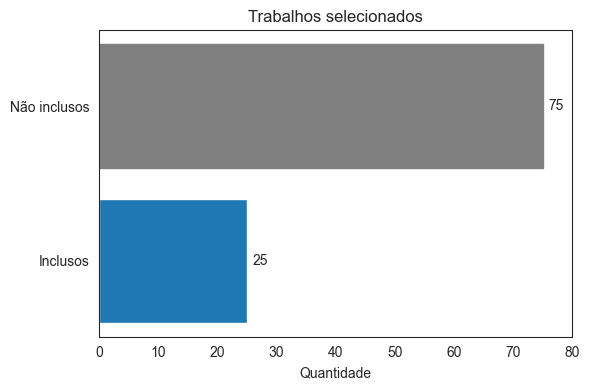

In [5]:
counts = (
    dfs["papers"]["included"]
    .map({True: "Inclusos", False: "Não inclusos"})
    .value_counts()
    .sort_values()
)

plt.figure(figsize=(6, 4))
bars = plt.barh(counts.index, counts.values)

bars[1].set_color("gray")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        str(width),
        va="center",
    )

plt.xlabel("Quantidade")
plt.xlim(0, counts.max() + 5)
plt.ylabel("")
plt.title("Trabalhos selecionados")
plt.tight_layout()

plt.savefig("figures/trabalhos_inclusos.png", dpi=300, bbox_inches="tight")
plt.show()

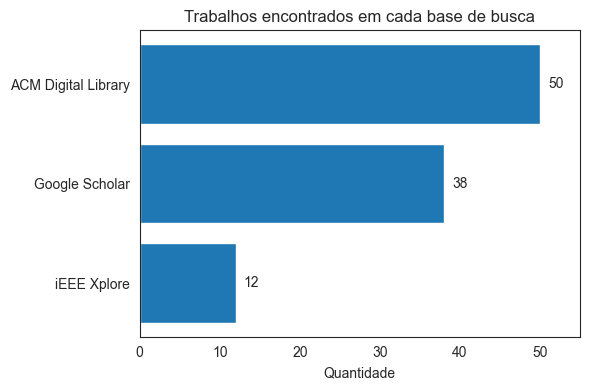

In [6]:
counts = (
    dfs["papers"]["engine"]
    .map(
        {
            "google_scholar": "Google Scholar",
            "acm_dl": "ACM Digital Library",
            "ieee_xplore": "iEEE Xplore",
        }
    )
    .value_counts()
    .sort_values()
)
counts

plt.figure(figsize=(6, 4))
bars = plt.barh(counts.index, counts.values)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        str(width),
        va="center",
    )

plt.xlabel("Quantidade")
plt.xlim(0, counts.max() + 5)
plt.ylabel("")
plt.title("Trabalhos encontrados em cada base de busca")
plt.tight_layout()

plt.savefig("figures/trabalhos_encontrados.png", dpi=300, bbox_inches="tight")
plt.show()

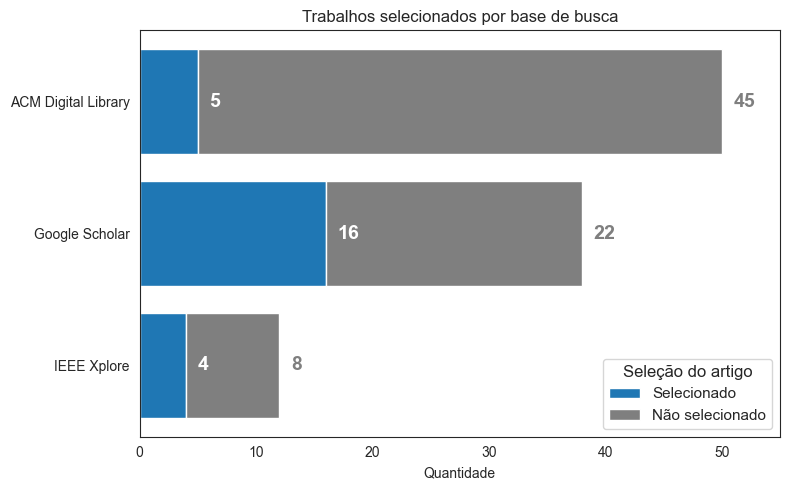

In [7]:
stacked_data = (
    dfs["papers"]
    .assign(
        engine=dfs["papers"]["engine"].map(
            {
                "google_scholar": "Google Scholar",
                "acm_dl": "ACM Digital Library",
                "ieee_xplore": "IEEE Xplore",
            }
        )
    )
    .groupby(["engine", "included"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={True: "Selecionado", False: "Não selecionado"})
)
stacked_data = (
    stacked_data.assign(
        total=stacked_data["Não selecionado"] + stacked_data["Selecionado"]
    )
    .sort_values(by="total", ascending=True)
    .drop(columns="total")
)

plt.figure(figsize=(8, 5))

colors = {"Selecionado": "tab:blue", "Não selecionado": "tab:gray"}

bottom = None
for label in ["Selecionado", "Não selecionado"]:
    values = stacked_data[label]
    bars = plt.barh(
        stacked_data.index, values, left=bottom, label=label, color=colors[label]
    )
    if bottom is None:
        bottom = values
    else:
        bottom = bottom + values

for i in range(len(stacked_data)):
    index = stacked_data.index[i]
    incluso_width = stacked_data.loc[index, "Selecionado"]
    nao_incluso_width = stacked_data.loc[index, "Não selecionado"]

    plt.text(
        x=incluso_width + 1,
        y=i,
        s=stacked_data.loc[index]["Selecionado"],
        va="center",
        color="white",
        fontweight="bold",
        fontsize=14,
    )

    plt.text(
        x=nao_incluso_width + incluso_width + 1,
        y=i,
        s=stacked_data.loc[index]["Não selecionado"],
        va="center",
        color="tab:gray",
        fontweight="bold",
        fontsize=14,
    )
max_total = (stacked_data["Selecionado"] + stacked_data["Não selecionado"]).max()
plt.xlim(0, max_total + 5)
plt.xlabel("Quantidade")
plt.title("Trabalhos selecionados por base de busca")
plt.legend(title="Seleção do artigo", fontsize=11, title_fontsize=12)
plt.tight_layout()

plt.savefig("figures/inclusos_base.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
sel_df = dfs["papers"][dfs["papers"]["included"] == True]

In [9]:
def extract_year(citation: str) -> int:
    return str.split(citation, ", ")[1].replace(")", "")

In [10]:
sel_df["year"] = sel_df["citation"].apply(extract_year)
sel_df

C:\Users\Vitor\AppData\Local\Temp\ipykernel_14904\4147786366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df["year"] = sel_df["citation"].apply(extract_year)


,doi,citation,reference,title,Aborda algoritmos de ataque adversarial contra redes neurais no contexto de visão computacional,Aborda mecanismos e práticas de defesa para aumentar a resiliência de uma rede neural a ataques adversariais,O estudo é revisado por pares,"Aborda visão computacional, mas não aborda ataques adversariais ou defesas contra esse tipo de ataque",O estudo é um artigo duplicado,included,related,engine,search_string,read,link,note,year
2,https://doi.org/10.1016/j.jai.2023.10.002,"(LIU et al., 2023)","​Liu, J.; Jin, Y. A comprehensive survey of ro...",A comprehensive survey of robust deep learning...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A comprehensive survey of robust deep learning...,NaN,2023
3,https://doi.org/10.1080/00031305.2021.2006781,"(LI et al., 2022)",NaN,A Review of Adversarial Attack and Defense for...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Review of Adversarial Attack and Defense for...,NaN,2022
5,https://doi.org/10.1007/s11042-023-15883-z,"(BAJAJ et al., 2024)","​Bajaj, A.; Vishwakarma, D. K. A state-of-the-...",A state-of-the-art review on adversarial machi...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A state-of-the-art review on adversarial machi...,NaN,2024
6,https://doi.org/10.48550/arXiv.1912.01667,"(BHAMBRI et al., 2020)","​Bhambri, S., Muku, S., Tulasi, A., & Buduru, ...",A Survey of Black-Box Adversarial Attacks on C...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Survey of Black-Box Adversarial Attacks on C...,NaN,2020
7,10.1109/ICCC59590.2023.10507598,"(WEI et al., 2023)",NaN,A Survey of Harnessing Self-Supervision Agains...,True,True,True,False,False,True,False,ieee_xplore,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Survey of Harnessing Self-Supervision Agains...,NaN,2023
8,https://doi.org/10.1145/3636551,"(LI et al., 2024)",NaN,A Survey of Robustness and Safety of 2D and 3D...,True,True,True,False,False,True,False,acm_dl,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Survey of Robustness and Safety of 2D and 3D...,NaN,2024
9,https://doi.org/10.1016/j.cose.2022.102847,"(LONG et al., 2022)","LONG, Teng; GAO, Qi; XU, Lili; ZHOU, Zhangbing...",A survey on adversarial attacks in computer vi...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A survey on adversarial attacks in computer vi...,NaN,2022
10,10.1109/ACCESS.2021.3127960,"(AKHTAR et al., 2021)","AKHTAR, N. et al. Advances in adversarial atta...",Advances in Adversarial Attacks and Defenses i...,True,True,True,False,False,True,True,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,Advances in Adversarial Attacks and Defenses i...,NaN,2021
11,https://doi.org/10.3390/electronics11081283,"(LIANG et al., 2022)","​Liang, H., He, E., Zhao, Y., Jia, Z., & Li, H...",Adversarial Attack and Defense: A Survey,True,True,True,False,False,True,True,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,Adversarial Attack and Defense: A Survey.pdf,NaN,2022
14,https://doi.org/10.1145/3691625,"(BADJIE et al., 2024)","​Badjie, B., Cecílio, J., & Casimiro, A. (2024...",Adversarial Attacks and Countermeasures on Ima...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,Adversarial Atacks and Countermeasures on Imag...,NaN,2024


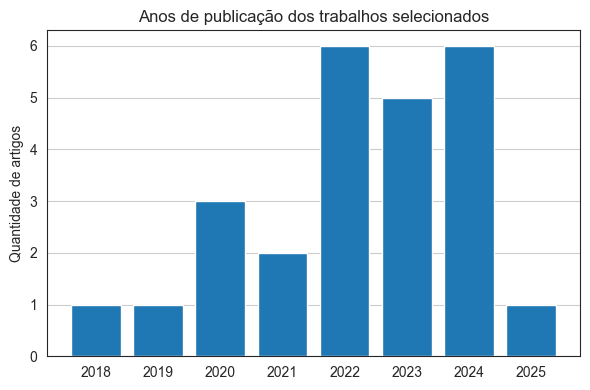

In [11]:
counts = sel_df["year"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index, counts.values)

plt.xlabel("")
plt.ylabel("Quantidade de artigos")
plt.grid(axis="y")
plt.title("Anos de publicação dos trabalhos selecionados")
plt.tight_layout()

plt.savefig("figures/anos_trabalhos_selecionados.png", dpi=300, bbox_inches="tight")
plt.show()

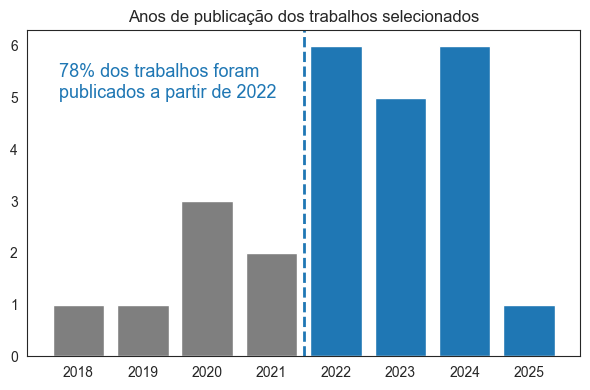

In [ ]:
counts = sel_df["year"].value_counts().sort_index()
counts.index = counts.index.astype(int)

plt.figure(figsize=(6, 4))
bar_colors = ["tab:gray" if value < 2022 else "tab:blue" for value in counts.index]

bars = plt.bar(counts.index, counts.values, color=bar_colors)

plt.axvline(2021.5, color="tab:blue", linestyle="--", linewidth=2, label="Corte 2021")
plt.text(
    2017.7,
    5,
    s="78% dos trabalhos foram\npublicados a partir de 2022",
    fontsize=13,
    color="tab:blue",
)
plt.xlabel("")
plt.title("Anos de publicação dos trabalhos selecionados")
plt.tight_layout()

plt.savefig("figures/anos_trabalhos_selecionados_v2.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
print(
    f"Porcentagem de trabalhos publicados desde 2024: {sum(sel_df['year'] >= '2024') / len(sel_df)} ({sum(sel_df['year'] >= '2024')} de {len(sel_df)})"
)

Porcentagem de trabalhos publicados desde 2024: 0.28 (7 de 25)


In [14]:
print(
    f"Porcentagem de trabalhos publicados desde 2024: {sum(sel_df['year'] >= '2022') / len(sel_df)} ({sum(sel_df['year'] >= '2022')} de {len(sel_df)})"
)

Porcentagem de trabalhos publicados desde 2024: 0.72 (18 de 25)


## Analisando os ataques encontrados

In [15]:
attacks = dfs["attacks"][dfs["attacks"]["notes"].notna()]

In [16]:
attacks

,attack,black,white,targeted,untargeted,norms,universal,specific,iterative,one_shot,categories,year,notes,mentions_attack,mention_count,sheet_source
0,FGSM,0,1,0,1,L_inf,0,1,0,1,gradient,2015,FGSM,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",24.0,"(LONG et al., 2022)"
1,PGD,0,1,1,0,L_inf,0,1,1,0,gradient,2017,PGD,"(LIU et al., 2023), (AKHTAR et al., 2021), (LI...",24.0,"(LONG et al., 2022)"
2,C&W,0,1,1,1,"L0,L2,L_inf",0,1,1,0,gradient,2017,C&W,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",21.0,"(LONG et al., 2022)"
3,DeepFool,0,1,0,1,"L2,L_inf",1,1,1,0,gradient,2015,DeepFool,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",20.0,"(LONG et al., 2022)"
4,BIM (I-FGSM),0,1,1,1,L_inf,0,1,1,0,gradient,2016,BIM,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",19.0,"(LONG et al., 2022)"
5,JSMA,0,1,1,0,L0,0,1,1,0,gradient,2015,JSMA,"(BADJIE et al., 2024), (BHAMBRI et al., 2020),...",18.0,"(LONG et al., 2022)"
7,GAP++,0,1,1,0,"L0,L2,L_inf",1,0,0,1,transfer,2019,GAP++,"(LIU et al., 2023), (BADJIE et al., 2024), (AK...",17.0,"(LIANG et al., 2022)"
8,L-BFGS,0,1,1,0,L_inf,0,1,1,0,gradient,2014,L-BFGS,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",16.0,"(LONG et al., 2022)"
12,UAP,0,1,0,1,"L2,L_inf",1,0,1,0,gradient,2017,UAP,"(LIU et al., 2023), (BADJIE et al., 2024), (DI...",14.0,"(LONG et al., 2022)"
13,ZOO,1,0,1,1,L2,0,1,1,0,"transfer,score",2017,ZOO,"(LIU et al., 2023), (BADJIE et al., 2024), (LI...",14.0,"(LONG et al., 2022)"


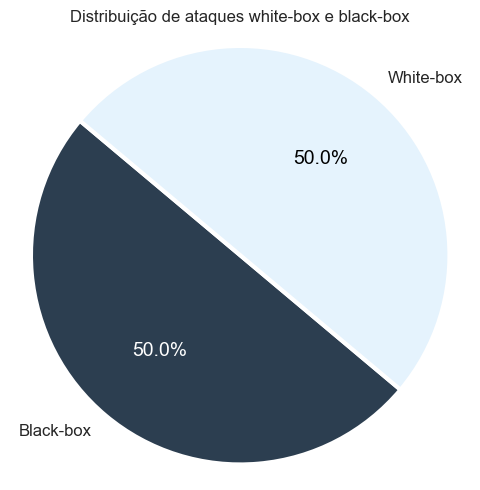

In [17]:
counts = {"Black-box": attacks["black"].sum(), "White-box": attacks["white"].sum()}

labels = list(counts.keys())
sizes = list(counts.values())
colors = ["#2c3e50", "#e5f3fd"]

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={"fontsize": 12},
    wedgeprops={"linewidth": 3, "edgecolor": "white"},
)

for autotext in autotexts:
    autotext.set_fontsize(14)
autotexts[0].set_color("white")  # First slice (Black-box)
autotexts[1].set_color("black")  # Second slice (White-box)

plt.title("Distribuição de ataques white-box e black-box")
plt.axis("equal")
plt.tight_layout()

plt.savefig("figures/dist_ataques.png", dpi=300, bbox_inches="tight")
plt.show()

In [18]:
attacks = attacks.sort_values(by="mention_count", ascending=False)
attacks

,attack,black,white,targeted,untargeted,norms,universal,specific,iterative,one_shot,categories,year,notes,mentions_attack,mention_count,sheet_source
0,FGSM,0,1,0,1,L_inf,0,1,0,1,gradient,2015,FGSM,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",24.0,"(LONG et al., 2022)"
1,PGD,0,1,1,0,L_inf,0,1,1,0,gradient,2017,PGD,"(LIU et al., 2023), (AKHTAR et al., 2021), (LI...",24.0,"(LONG et al., 2022)"
2,C&W,0,1,1,1,"L0,L2,L_inf",0,1,1,0,gradient,2017,C&W,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",21.0,"(LONG et al., 2022)"
3,DeepFool,0,1,0,1,"L2,L_inf",1,1,1,0,gradient,2015,DeepFool,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",20.0,"(LONG et al., 2022)"
4,BIM (I-FGSM),0,1,1,1,L_inf,0,1,1,0,gradient,2016,BIM,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",19.0,"(LONG et al., 2022)"
5,JSMA,0,1,1,0,L0,0,1,1,0,gradient,2015,JSMA,"(BADJIE et al., 2024), (BHAMBRI et al., 2020),...",18.0,"(LONG et al., 2022)"
7,GAP++,0,1,1,0,"L0,L2,L_inf",1,0,0,1,transfer,2019,GAP++,"(LIU et al., 2023), (BADJIE et al., 2024), (AK...",17.0,"(LIANG et al., 2022)"
8,L-BFGS,0,1,1,0,L_inf,0,1,1,0,gradient,2014,L-BFGS,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",16.0,"(LONG et al., 2022)"
12,UAP,0,1,0,1,"L2,L_inf",1,0,1,0,gradient,2017,UAP,"(LIU et al., 2023), (BADJIE et al., 2024), (DI...",14.0,"(LONG et al., 2022)"
13,ZOO,1,0,1,1,L2,0,1,1,0,"transfer,score",2017,ZOO,"(LIU et al., 2023), (BADJIE et al., 2024), (LI...",14.0,"(LONG et al., 2022)"


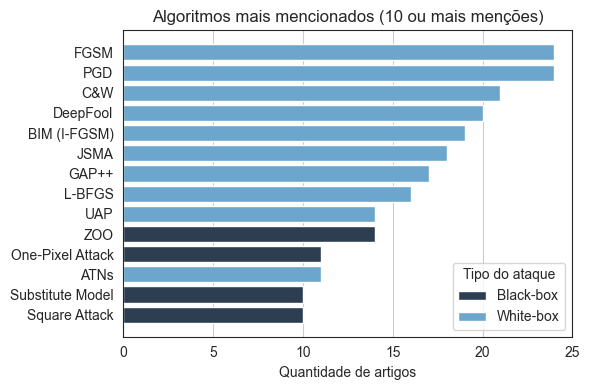

In [19]:
counts = attacks[["attack", "mention_count", "white", "black"]].sort_values(
    by="mention_count", ascending=False
)

counts = counts[counts["mention_count"] >= 10]
counts = counts.iloc[::-1]

colors = ["#2c3e50" if row["black"] == 1 else "#6CA6CD" for _, row in counts.iterrows()]

legend_elements = [
    Patch(facecolor="#2c3e50", label="Black-box"),
    Patch(facecolor="#6CA6CD", label="White-box"),
]

plt.figure(figsize=(6, 4))
bars = plt.barh(counts["attack"], counts["mention_count"], color=colors)

plt.legend(handles=legend_elements, title="Tipo do ataque")
plt.xlabel("Quantidade de artigos")
plt.xlim(0, counts["mention_count"].max() + 1)
plt.ylabel("")
plt.grid(axis="x")
plt.title("Algoritmos mais mencionados (10 ou mais menções)")
plt.tight_layout()

plt.savefig("figures/top_ataques.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
attacks = pd.concat(
    [
        attacks.drop(columns="categories"),
        attacks["categories"].str.get_dummies(sep=","),
    ],
    axis=1,
)

In [21]:
attacks

,attack,black,white,targeted,untargeted,norms,universal,specific,iterative,one_shot,...,mentions_attack,mention_count,sheet_source,attention,decision,geometric_transformation,gradient,optimization,score,transfer
0,FGSM,0,1,0,1,L_inf,0,1,0,1,...,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",24.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
1,PGD,0,1,1,0,L_inf,0,1,1,0,...,"(LIU et al., 2023), (AKHTAR et al., 2021), (LI...",24.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
2,C&W,0,1,1,1,"L0,L2,L_inf",0,1,1,0,...,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",21.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
3,DeepFool,0,1,0,1,"L2,L_inf",1,1,1,0,...,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",20.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
4,BIM (I-FGSM),0,1,1,1,L_inf,0,1,1,0,...,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",19.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
5,JSMA,0,1,1,0,L0,0,1,1,0,...,"(BADJIE et al., 2024), (BHAMBRI et al., 2020),...",18.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
7,GAP++,0,1,1,0,"L0,L2,L_inf",1,0,0,1,...,"(LIU et al., 2023), (BADJIE et al., 2024), (AK...",17.0,"(LIANG et al., 2022)",0,0,0,0,0,0,1
8,L-BFGS,0,1,1,0,L_inf,0,1,1,0,...,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",16.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
12,UAP,0,1,0,1,"L2,L_inf",1,0,1,0,...,"(LIU et al., 2023), (BADJIE et al., 2024), (DI...",14.0,"(LONG et al., 2022)",0,0,0,1,0,0,0
13,ZOO,1,0,1,1,L2,0,1,1,0,...,"(LIU et al., 2023), (BADJIE et al., 2024), (LI...",14.0,"(LONG et al., 2022)",0,0,0,0,0,1,1


In [22]:
counts = {
    "Gradiente": attacks["gradient"].sum(),
    "Decisão": attacks["decision"].sum(),
    "Atenção": attacks["attention"].sum(),
    "Transformação Geométrica": attacks["geometric_transformation"].sum(),
    "Otimização": attacks["optimization"].sum(),
    "Escore": attacks["score"].sum(),
    "Transferência": attacks["transfer"].sum(),
}
counts = pd.DataFrame(list(counts.items()), columns=["Categoria", "Quantidade"])
counts = counts.sort_values(by="Quantidade", ascending=True)
counts

,Categoria,Quantidade
2,Atenção,1
1,Decisão,4
3,Transformação Geométrica,5
4,Otimização,6
5,Escore,8
6,Transferência,9
0,Gradiente,16


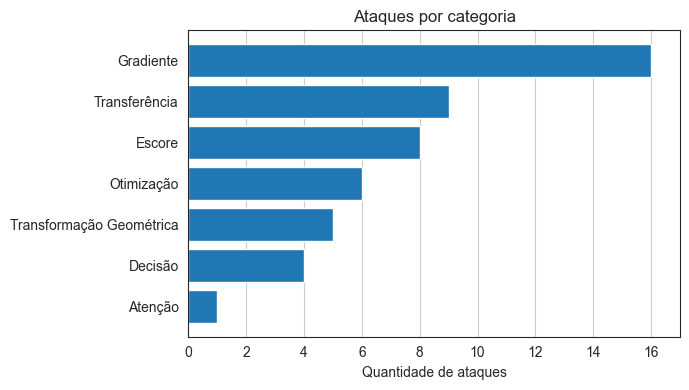

In [23]:
plt.figure(figsize=(7, 4))
bars = plt.barh(counts["Categoria"], counts["Quantidade"])

plt.xlabel("Quantidade de ataques")
plt.xlim(0, counts["Quantidade"].max() + 1)
plt.ylabel("")
plt.grid(axis="x")
plt.title("Ataques por categoria")
plt.tight_layout()

plt.savefig("figures/categoria_ataques.png", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
attacks = pd.concat(
    [
        attacks.drop(columns="norms"),
        attacks["norms"].str.get_dummies(sep=","),
    ],
    axis=1,
)

In [25]:
drop_cols = [
    "attack",
    "notes",
    "mentions_attack",
    "sheet_source",
]
attacks.drop(columns=drop_cols, axis=1, inplace=True)
attacks

,black,white,targeted,untargeted,universal,specific,iterative,one_shot,year,mention_count,...,decision,geometric_transformation,gradient,optimization,score,transfer,L0,L2,L_inf,w_dist
0,0,1,0,1,0,1,0,1,2015,24.0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,1,0,0,1,1,0,2017,24.0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,1,1,0,1,1,0,2017,21.0,...,0,0,1,0,0,0,1,1,1,0
3,0,1,0,1,1,1,1,0,2015,20.0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,1,1,0,1,1,0,2016,19.0,...,0,0,1,0,0,0,0,0,1,0
5,0,1,1,0,0,1,1,0,2015,18.0,...,0,0,1,0,0,0,1,0,0,0
7,0,1,1,0,1,0,0,1,2019,17.0,...,0,0,0,0,0,1,1,1,1,0
8,0,1,1,0,0,1,1,0,2014,16.0,...,0,0,1,0,0,0,0,0,1,0
12,0,1,0,1,1,0,1,0,2017,14.0,...,0,0,1,0,0,0,0,1,1,0
13,1,0,1,1,0,1,1,0,2017,14.0,...,0,0,0,0,1,1,0,1,0,0


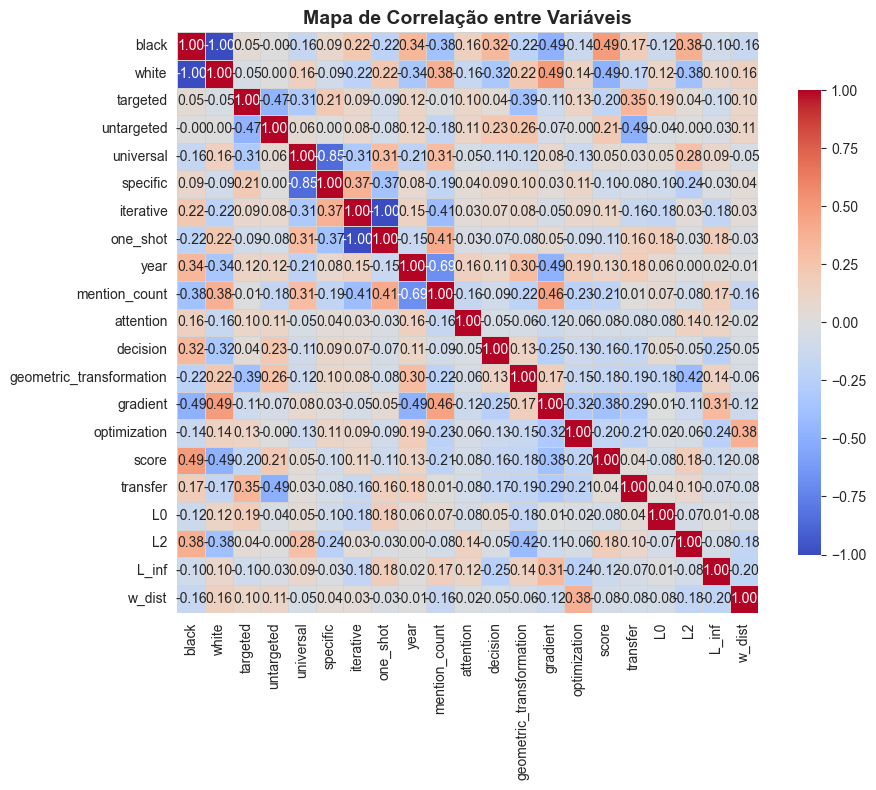

In [26]:
corr = attacks.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor="lightgray",
    square=True,
    cbar_kws={"shrink": 0.8},
)

plt.title("Mapa de Correlação entre Variáveis", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

## Analisando as defesas encontradas

In [27]:
defenses = dfs["defenses"]
defenses

,defense,defense_pt_br,category,subcategory,notes,mentions_attack,mention_count,source,poor_against,effective_against
0,Brute-Force Adversarial Training,Treinamento Adversarial,Modified Training / Input,NaN,Brute-Force Adversarial Training,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",23,"(AKHTAR et al., 2018)",NaN,"FGSM (BADJIE et al., 2024),\nDeepFool (BADJIE ..."
1,Data Compression as a Defense,Compressão de Dados como Defesa,Modified Training / Input,NaN,Data Compression as a Defense,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",17,"(AKHTAR et al., 2018)","UAP (AKHTAR et al., 2018)","L2 C&W (KHAMAISEH et al., 2022),\nFGSM (AKHTA..."
2,MagNet,MagNet,Network Add-Ons,Complete Defense,MagNet,"(LIU et al., 2023), (BADJIE et al., 2024), (LI...",15,"(AKHTAR et al., 2018)","C&W (AKHTAR et. al., 2018)","FGSM (KHAMAISEH et al., 2022; BADJIE et al., 2..."
3,Defensive Distillation,Destilação Defensiva,Modified Networks,Complete Defense,Defensive Distillation,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",14,"(AKHTAR et al., 2018)","C&W (AKHTAR et. al., 2018)","FGSM (BADJIE et al., 2024),\nJSMA (KHAMAISEH e..."
4,Randomization,Aleatorização,Modified Networks,Complete Defense,Randomization,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",14,"(BHAMBRI et al., 2020)",NaN,"FGSM (BADJIE et al., 2024),\nDeepFool (BADJIE ..."
5,Defense-GAN,Defense-GAN,Modified Training / Input,NaN,Defense-GAN,"(LIU et al., 2023), (AKHTAR et al., 2021), (LI...",14,"(BHAMBRI et al., 2020)",NaN,NaN
6,Feature Squeezing,Feature Squeezing,Network Add-Ons,Detection Only,Feature Squeezing,"(LIU et al., 2023), (BADJIE et al., 2024), (KH...",13,"(AKHTAR et al., 2018)",NaN,"FGSM (AKHTAR et al., 2018; KHAMAISEH et al., 2..."
7,Gradient Regularization / Masking,Regularização / Máscara do Gradiente,Modified Networks,Complete Defense,Gradient Regularization / Masking,"(LIU et al., 2023), (BADJIE et al., 2024), (LI...",10,"(AKHTAR et al., 2018)",NaN,"FGSM (AKHTAR et al., 2018; KHAMAISEH et al., 2..."
8,Parseval Networks,Redes de Parseval,Modified Networks,Complete Defense,Parseval Networks,"(LIU et al., 2023), (KHAMAISEH et al., 2022), ...",9,"(AKHTAR et al., 2018)",NaN,"FGSM (KHAMAISEH et al., 2022)"
9,Guided Denoiser,Denoiser Guiado,Modified Training / Input,NaN,Guided Denoiser,"(BADJIE et al., 2024), (LIANG et al., 2022), (...",9,"(BHAMBRI et al., 2020)",NaN,NaN


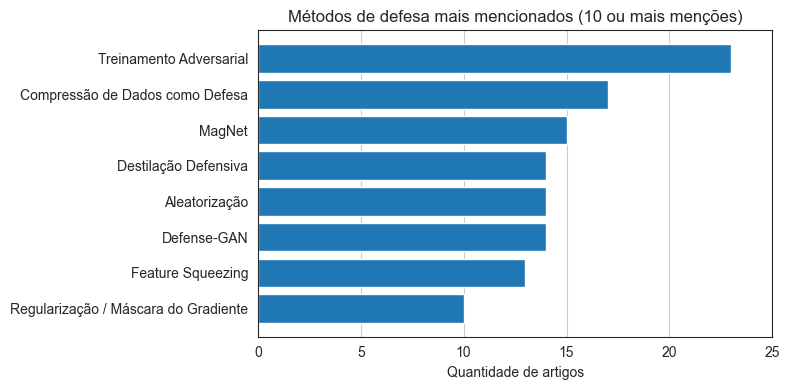

In [28]:
counts = defenses[["defense_pt_br", "mention_count"]].sort_values(
    by="mention_count", ascending=False
)

counts = counts[counts["mention_count"] >= 10]
counts = counts.iloc[::-1]

plt.figure(figsize=(8, 4))
bars = plt.barh(counts["defense_pt_br"], counts["mention_count"])

plt.xlabel("Quantidade de artigos")
plt.xlim(0, counts["mention_count"].max() + 2)
plt.ylabel("")
plt.grid(axis="x")
plt.title("Métodos de defesa mais mencionados (10 ou mais menções)")
plt.tight_layout()

plt.savefig("figures/top_defesas.png", dpi=300, bbox_inches="tight")
plt.show()

In [29]:
defenses["category"] = defenses["category"].replace(
    {
        "Modified Networks": "Redes Modificadas",
        "Modified Training / Input": "Modificação de Treino / Entrada",
        "Network Add-Ons": "Add-Ons para a Rede",
    }
)

In [30]:
defenses["subcategory"] = defenses["subcategory"].replace(
    {
        "Complete Defense": "Defesas Completas",
        "Detection Only": "Apenas Detecção",
    }
)

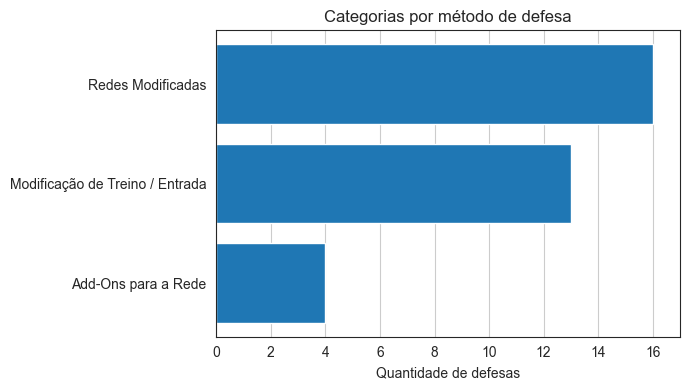

In [31]:
counts = defenses.category.value_counts().sort_values(ascending=True)

plt.figure(figsize=(7, 4))
bars = plt.barh(counts.index, counts.values)

plt.xlabel("Quantidade de defesas")
plt.xlim(0, counts.values.max() + 1)
plt.ylabel("")
plt.grid(axis="x")
plt.title("Categorias por método de defesa")
plt.tight_layout()

plt.savefig("figures/categoria_defesas.png", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
modified_networks = defenses[defenses["category"] == "Redes Modificadas"]
network_add_ons = defenses[defenses["category"] == "Add-Ons para a Rede"]

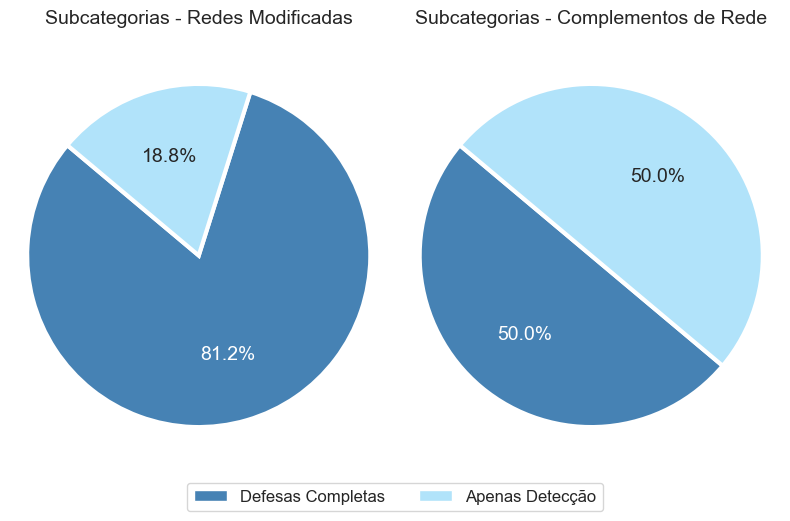

In [33]:
mod_counts = modified_networks.subcategory.value_counts()
add_on_counts = network_add_ons.subcategory.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

wedges, texts, autotexts = axes[0].pie(
    mod_counts.values,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"fontsize": 14},
    wedgeprops={"linewidth": 3, "edgecolor": "white"},
    colors=["steelblue", "#b1e3fa"],
)

autotexts[0].set_color("white")
axes[0].set_title("Subcategorias - Redes Modificadas", fontsize=14)
axes[0].axis("equal")

wedges, texts, autotexts = axes[1].pie(
    add_on_counts.values,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"fontsize": 14},
    wedgeprops={"linewidth": 3, "edgecolor": "white"},
    colors=["steelblue", "#b1e3fa"],
)

autotexts[0].set_color("white")
axes[1].set_title("Subcategorias - Complementos de Rede", fontsize=14)
axes[1].axis("equal")

legend_elements = [
    Patch(facecolor="steelblue", label="Defesas Completas"),
    Patch(facecolor="#b1e3fa", label="Apenas Detecção"),
]

fig.legend(
    handles=legend_elements,
    loc="lower center",
    ncol=2,
    bbox_to_anchor=(0.5, -0.05),
    fontsize=12,
)

plt.tight_layout()

plt.savefig("figures/subcategoria_defesas.png", dpi=300, bbox_inches="tight")
plt.show()

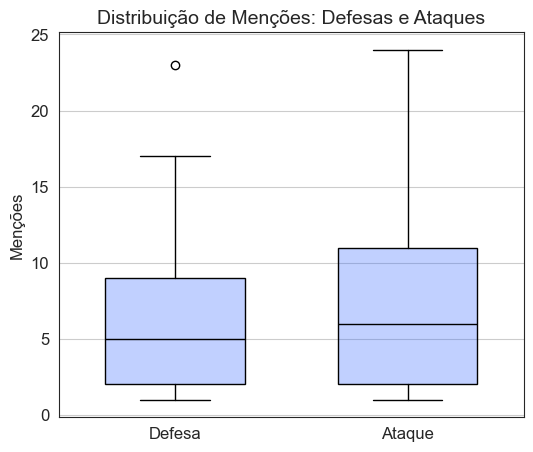

In [34]:
defense_data = defenses["mention_count"]
attack_data = attacks["mention_count"]

data = [defense_data, attack_data]
labels = ["Defesa", "Ataque"]

fig, ax = plt.subplots(figsize=(6, 5))

box = ax.boxplot(
    [defenses["mention_count"], attacks["mention_count"]],
    patch_artist=True,
    tick_labels=["Defesa", "Ataque"],
    widths=0.6,
)


for patch in box["boxes"]:
    patch.set_facecolor((0.2, 0.4, 1.0, 0.3))

for element in ["whiskers", "caps", "medians"]:
    for line in box[element]:
        line.set_color("black")

ax.set_title("Distribuição de Menções: Defesas e Ataques", fontsize=14)
ax.set_ylabel("Menções", fontsize=12)
ax.tick_params(axis="both", labelsize=12)
ax.grid(True, axis="y")

plt.savefig("figures/mencoes_defesas_ataques.png", dpi=300, bbox_inches="tight")
plt.show()